## POSTTEST 5
### AGDITHA EVALYN LOLONGAN
#### 2109106030

## import library

In [145]:
import pandas as pd
import seaborn as sns

In [146]:
df = pd.read_csv("tested.csv")

## Bersihkan nilai null

##### data ada nilai null

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [148]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") 

In [149]:
df["Age"]=imputer.fit_transform(df[["Age"]])

In [150]:
imputer = SimpleImputer(strategy="mean") 

In [151]:
imputer = SimpleImputer(strategy="most_frequent")

In [152]:
df["Fare"]=imputer.fit_transform(df[["Fare"]])

In [153]:
df["Cabin"]=imputer.fit_transform(df[["Cabin"]])

### data sudah dibersihkan

In [154]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [155]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [156]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [157]:
X = df[['PassengerId', 'Survived','Pclass','Age', 'SibSp', 'Parch', 'Fare']]
Y = df['Sex']

## Data splitting

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## menggunakan algoritma untuk membandingkan score

# ---KNN algoritma----

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [162]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [163]:
print("Nilai akurasi Training =")
modelKNN.score(X_train, Y_train)

Nilai akurasi Training =


0.7634730538922155

In [164]:
print("Nilai akurasi Testing =")
modelKNN.score(X_test, Y_test)

Nilai akurasi Testing =


0.5714285714285714

## ---DESICION TREE---

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
modelDT = DecisionTreeClassifier().fit(X_train, Y_train)

In [167]:
print("Nilai akurasi Training =")
modelDT.score(X_train, Y_train)

Nilai akurasi Training =


1.0

In [168]:
print("Nilai akurasi Testing =" )
modelDT.score(X_test, Y_test)

Nilai akurasi Testing =


1.0

In [169]:
import matplotlib.pyplot as plt
from sklearn import tree

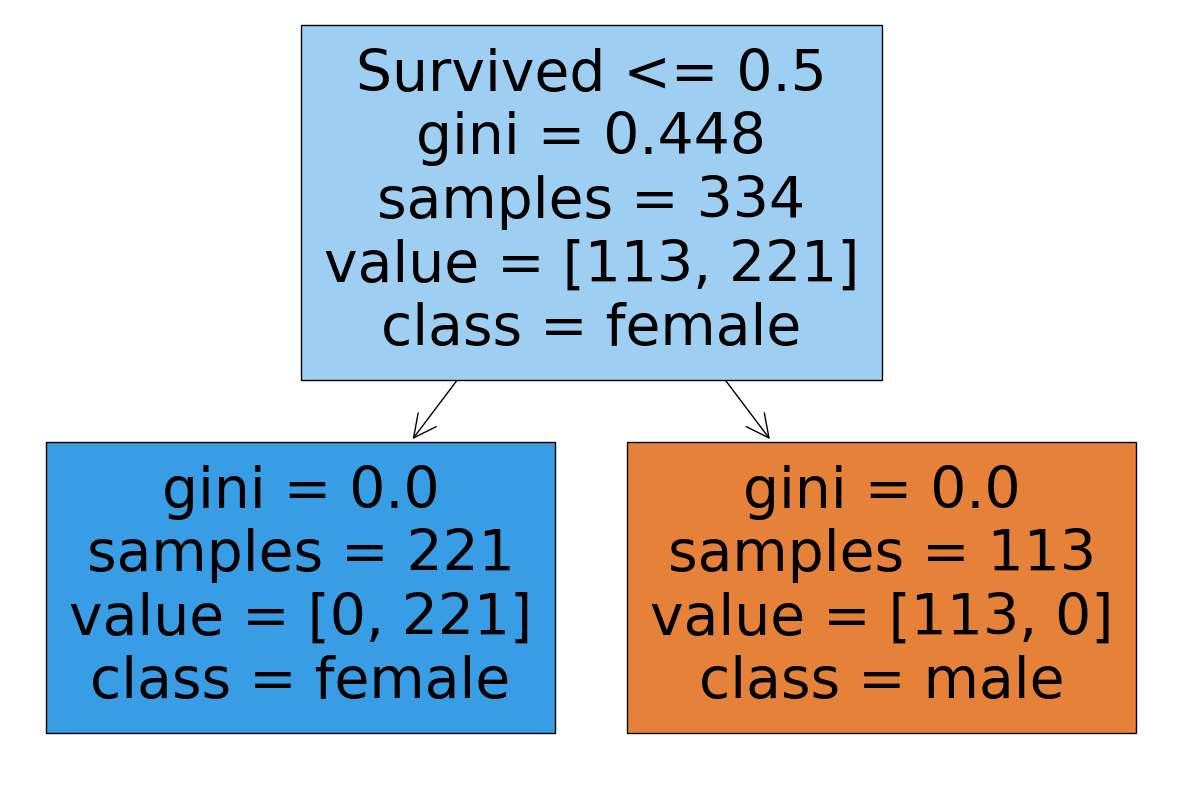

In [170]:
plt.figure(figsize = (15, 10))
tree.plot_tree(
    modelDT,
    feature_names = X.columns,
    filled = True,
    class_names = Y.unique()
)
plt.show()

# NAIVE BAIYES 

In [175]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [176]:
gnb = GaussianNB().fit(X_train, Y_train)

In [177]:
gnb_predict = gnb.predict(X_test)

In [178]:
print(f'Nilai akurasi Testing = {accuracy_score(gnb_predict, Y_test)}')

Nilai akurasi Testing = 1.0


## PERBANDINGAN SCORE antar Algoritma

In [181]:
print("++++++++++++++++++++++++++++++++++++")
print("----------ALgoritma KNN-------------")
print("Nilai akurasi Training =",modelKNN.score(X_train, Y_train))
print("Nilai akurasi Testing =",modelKNN.score(X_test, Y_test) )
print("++++++++++++++++++++++++++++++++++++")
print("-----------Decision Tree------------")
print("Nilai akurasi Training =",modelDT.score(X_train, Y_train))
print("Nilai akurasi Testing =",modelDT.score(X_test, Y_test))
print("+++++++++++++++++++++++++++++++++++++")
print("-----------Naive Baiyes--------------")
print(f'Nilai akurasi Testing = {accuracy_score(gnb_predict, Y_test)}')

++++++++++++++++++++++++++++++++++++
----------ALgoritma KNN-------------
Nilai akurasi Training = 0.7634730538922155
Nilai akurasi Testing = 0.5714285714285714
++++++++++++++++++++++++++++++++++++
-----------Decision Tree------------
Nilai akurasi Training = 1.0
Nilai akurasi Testing = 1.0
+++++++++++++++++++++++++++++++++++++
-----------Naive Baiyes--------------
Nilai akurasi Testing = 1.0


### score terbaik ada di naive baiyes dan decision tree